In [3]:
from mxnet import ndarray as nd
from mxnet import autograd as ag
from mxnet import gluon

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
from matplotlib import pyplot as plt

num_train = 20
num_test = 100
num_inputs = 200

true_w = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05

x = nd.random.normal(shape=(num_train + num_test, num_inputs))
y = nd.dot(x, true_w)
y += .01 * nd.random.normal(shape=y.shape)

x_train, x_test = x[:num_train, :], x[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

In [8]:
batch_size = 1
dataset_train = gluon.data.ArrayDataset(x_train, y_train)
data_iter_train = gluon.data.DataLoader(dataset_train, batch_size, shuffle=True)

square_loss = gluon.loss.L2Loss()


def test(net, x, y):
    return square_loss(net(x),y).mean().asscalar()

def train(weight_decay):
    learning_rate = 0.005
    epochs = 10

    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': learning_rate, 'wd': weight_decay})
    train_loss = []
    test_loss = []

    for e in range(epochs):
        for data, label in data_iter_train:
            with ag.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(test(net, x_train, y_train))
        test_loss.append(test(net, x_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train', 'test'])

    plt.show()

    return ('learned w[:10]:', net[0].weight.data()[:, :10],
           'learned b:', net[0].bias.data())

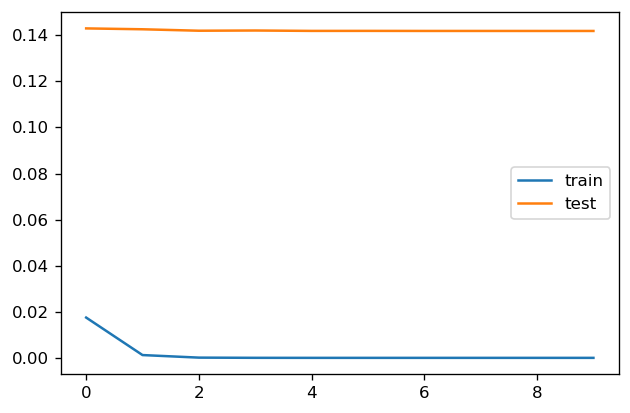

('learned w[:10]:', 
 [[ 0.00272427  0.01982414 -0.03133195  0.08544116  0.07013126 -0.04073263
    0.02287354  0.03408746  0.01645239  0.03088845]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [0.0092112]
 <NDArray 1 @cpu(0)>)

In [9]:
train(0)

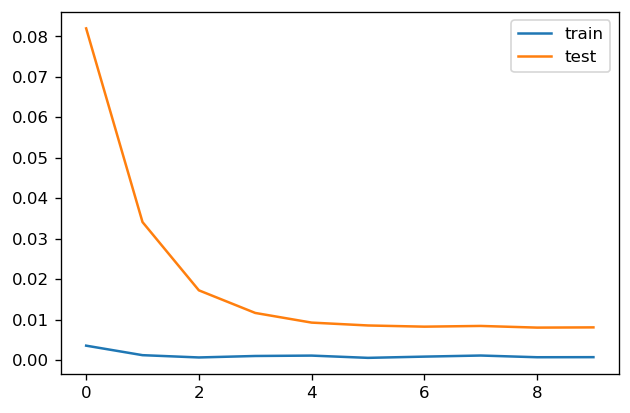

('learned w[:10]:', 
 [[ 0.00201691 -0.00013983 -0.00089532  0.00134334  0.00253272  0.00332897
    0.00169374  0.00109499 -0.00122791 -0.00448418]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [-0.00020449]
 <NDArray 1 @cpu(0)>)

In [10]:
train(5)

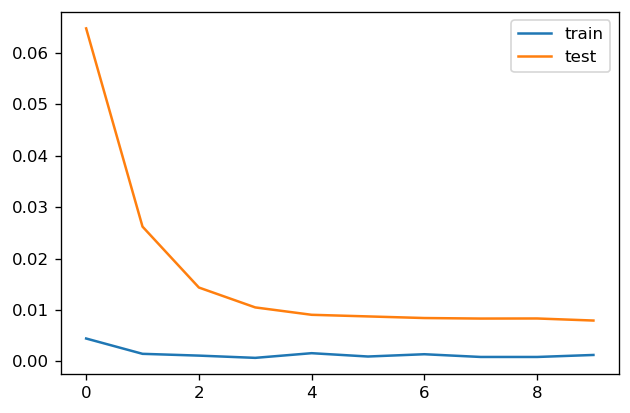

('learned w[:10]:', 
 [[ 0.0009593  -0.00018243 -0.0013601   0.00125751  0.00216605  0.00276827
    0.00126671  0.0023277  -0.00156314 -0.00447674]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [-0.00076809]
 <NDArray 1 @cpu(0)>)

In [11]:
train(6)